# Analyze dataset

# 1. Imports

## 1.1 Packages

In [1]:
import os
import sys

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Option packages

pd.set_option('display.max_columns', 500)

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

In [3]:
sys.path.append('/Users/Benjamin/Git/Kaggle/nlp_disaster_tweets/src')
from features.build_features import word_count_tweet, unique_word_count_tweet, url_count_tweet, mean_word_length_tweet,\
    char_count_tweet, punctuation_count_tweet, hashtag_count_tweet, mention_count_tweet

## 1.2 Options

In [4]:
path_data = '../data/raw/'

## 1.2 Datasets

In [5]:
df = pd.read_csv(os.path.join(path_data, 'train.csv'), index_col=0)

In [6]:
df.sample(2)

,keyword,location,text,target
id,,,,
5514,flattened,Some other mansion,Flattened all cartoony-like.\n'Whoa there Papa...,0
9675,tornado,"Fort Knox, KY 40121",@SakhalinTribune Calgary area tornado warnings...,1


# 2. Analyze data

In [7]:
print('Shape of the dataset', df.shape)

Shape of the dataset (7613, 4)


## 2.1 Keyword and location

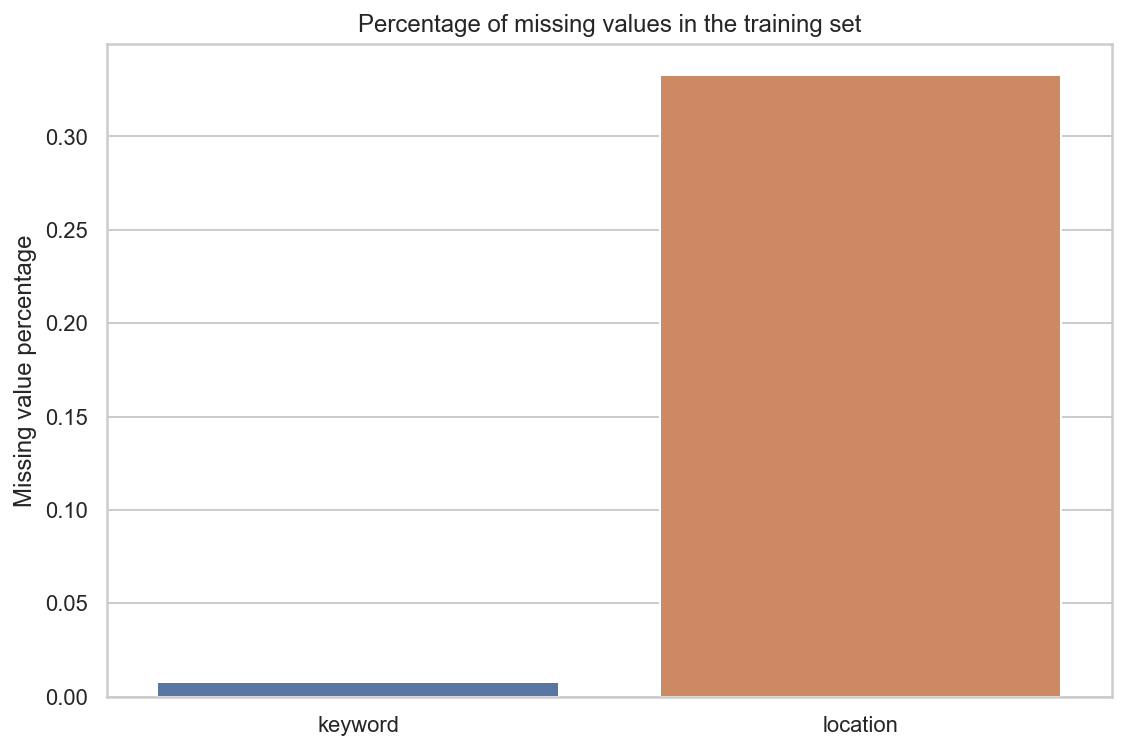

In [8]:
feats = ['keyword', 'location']

fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x=df[feats].isna().sum().index, y=(df[feats].isna().sum() / df.shape[0]).values, ax=ax)
ax.set_ylabel('Missing value percentage')
ax.set_title('Percentage of missing values in the training set')

plt.show()

More than 30% of the locations are missing in the dataset.

In [9]:
n_unique_key = df.keyword.nunique()
n_unique_loc = df.location.nunique()

print('Number of unique values for the keyword feature: ', n_unique_key)
print('Number of unique values for the location feature:', n_unique_loc)

Number of unique values for the keyword feature:  221
Number of unique values for the location feature: 3341


In [10]:
df.keyword.value_counts(dropna=False)

NaN                      61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [11]:
df.location.value_counts(dropna=False)

NaN                             2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: location, Length: 3342, dtype: int64

## 2.2 Tweets info

In [12]:
df.iloc[2]['text']

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [13]:
df = df.pipe(word_count_tweet)\
    .pipe(unique_word_count_tweet)\
    .pipe(url_count_tweet)\
    .pipe(mean_word_length_tweet)\
    .pipe(char_count_tweet)\
    .pipe(punctuation_count_tweet)\
    .pipe(hashtag_count_tweet)\
    .pipe(mention_count_tweet)

In [14]:
df.sample(5)

,keyword,location,text,target,word_count,unique_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
id,,,,,,,,,,,,
5004,explosion,Palestine Texas,You Are Invited to The Expo Explosion Summer E...,1,20,20,1,5.600000,132,11,0,0
4327,dust%20storm,Û¢5Û¢12Û¢14Û¢ | åÈ#SaviourSquadåÇ,I NEED THE DUST STORM FILM ASAP\n\nALSO\n\n*wa...,0,16,15,0,4.812500,94,3,0,1
2931,danger,"Boston, MA",.@Uber is looking to repair its recent bad rap...,0,14,14,1,6.500000,104,9,1,1
2587,crash,NaN,??One night and we're gonna come and crash the...,0,17,15,1,5.882353,116,12,0,0
2275,cliff%20fall,NaN,Fall off a cliff please https://t.co/4vWSL2Gfp0,1,6,6,1,7.000000,48,5,0,0


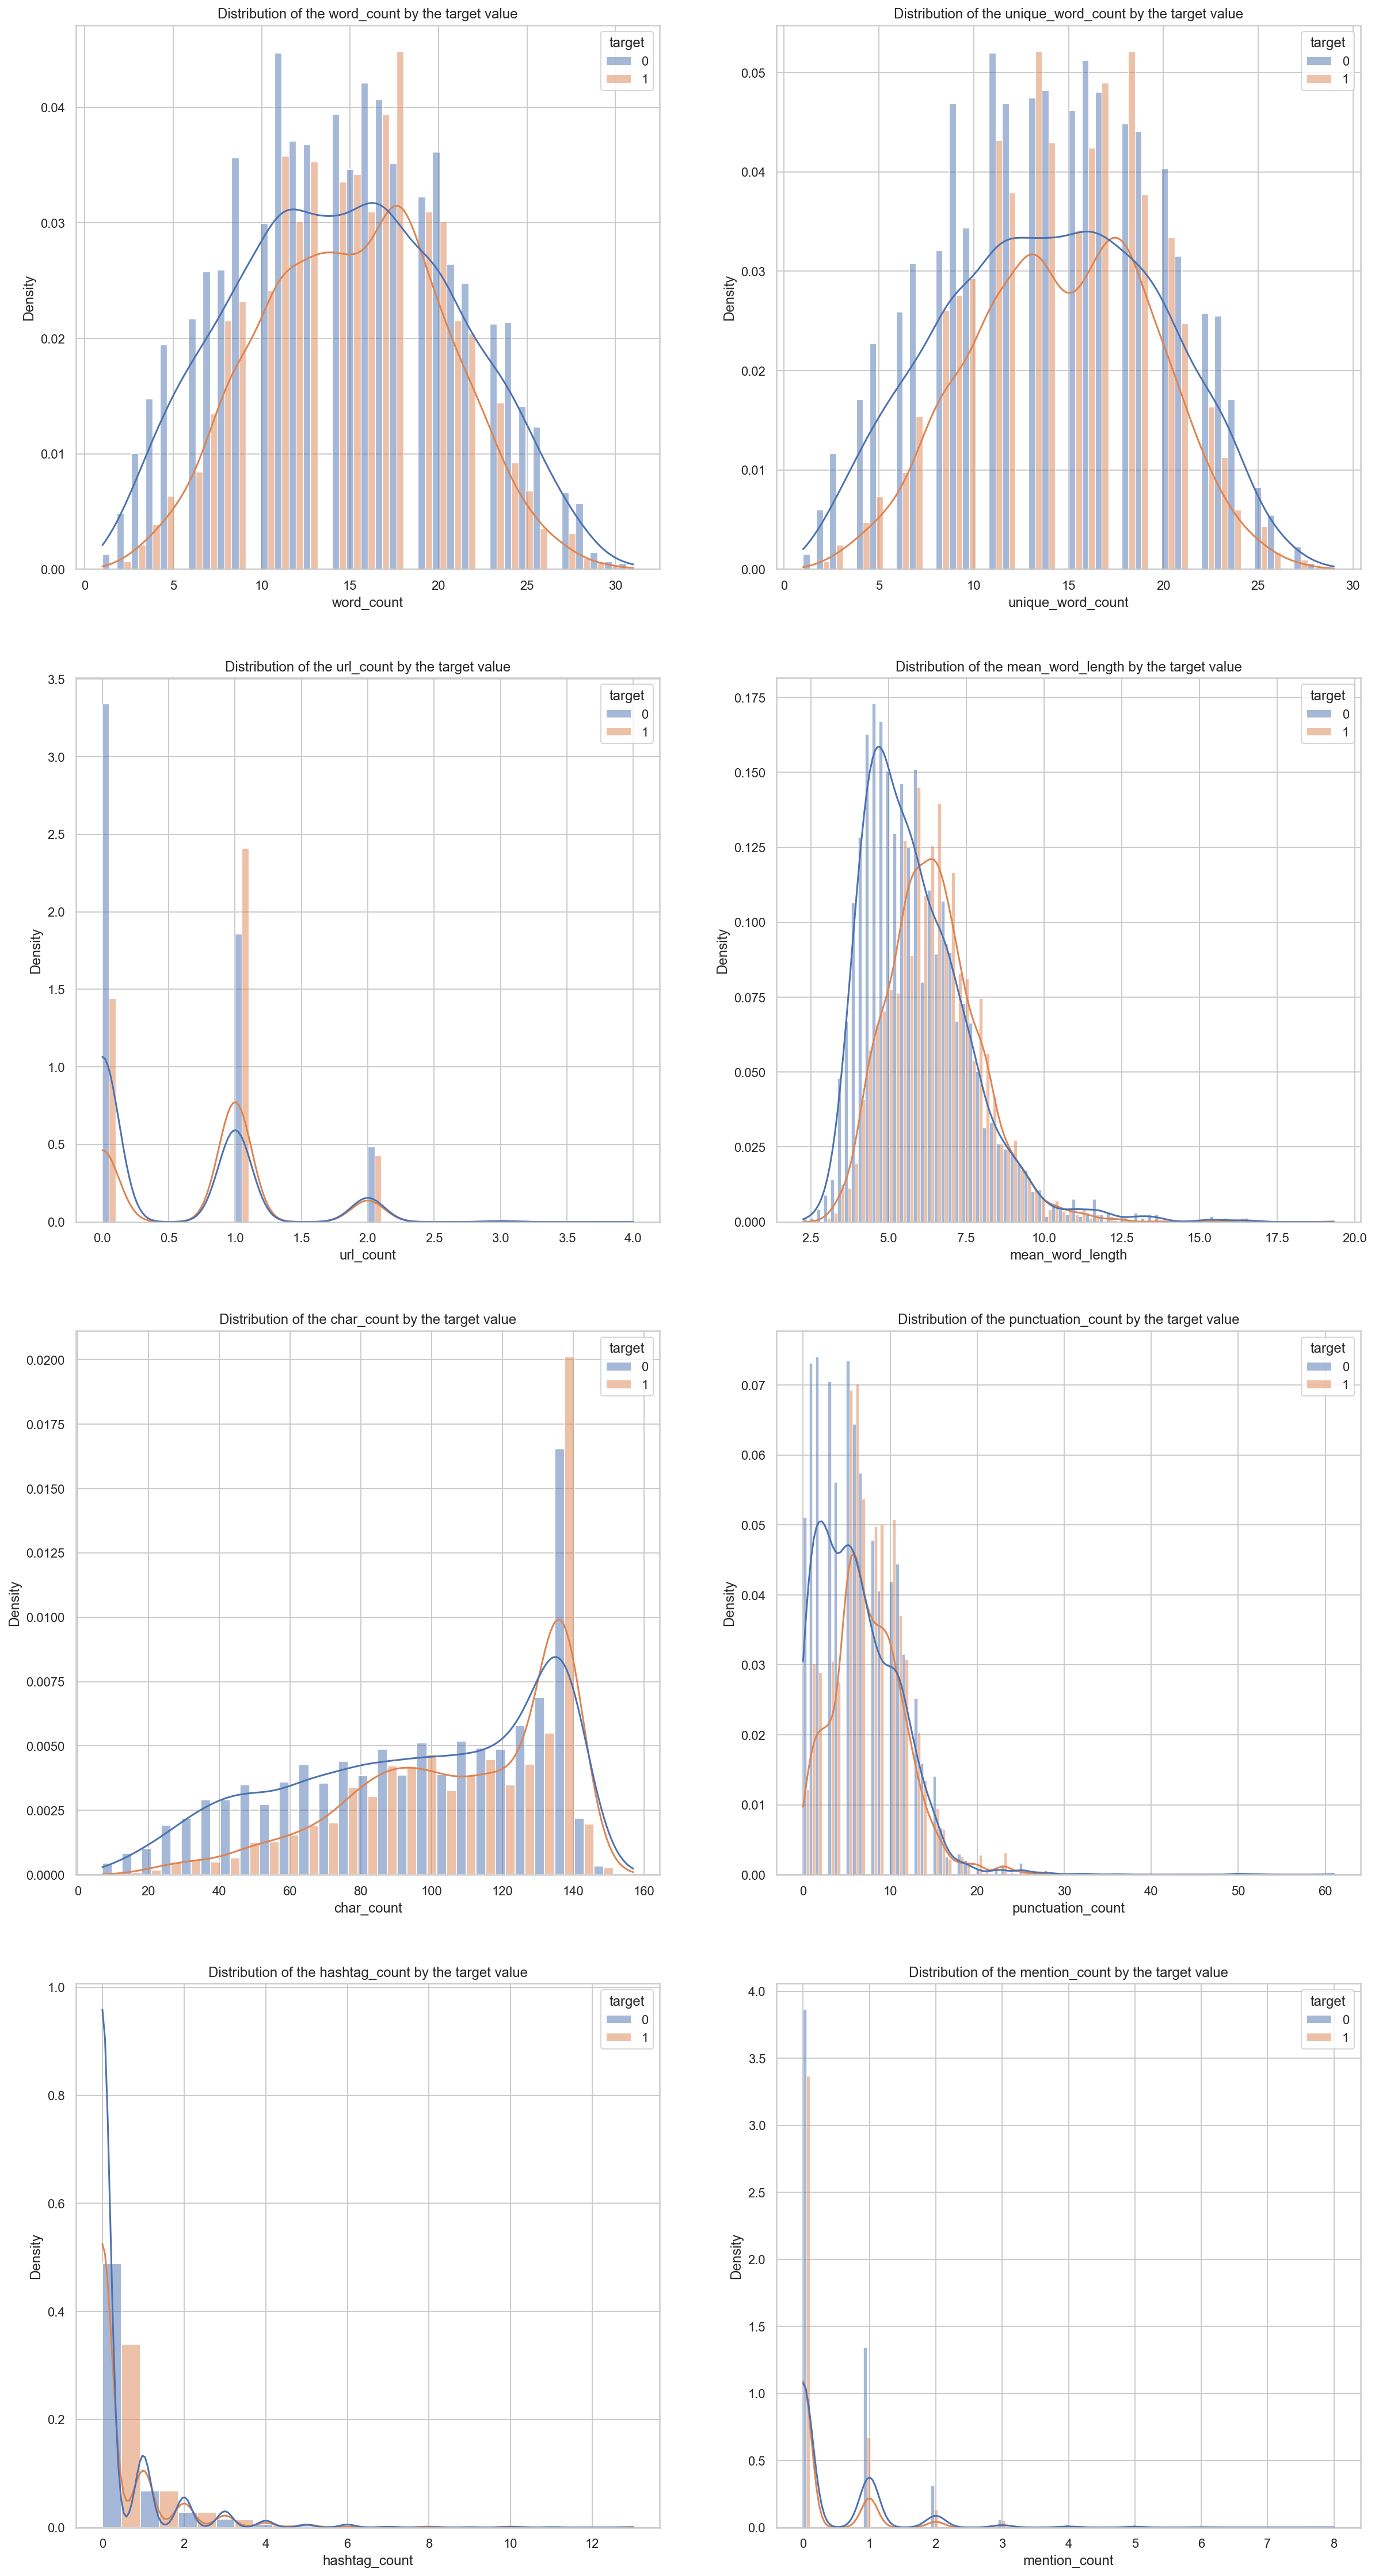

In [16]:
# Plot distribution of tweet info

feat_tweet_info = [
    'word_count', 'unique_word_count', 'url_count', 'mean_word_length', 'char_count', 'punctuation_count', 'hashtag_count', 'mention_count'
]

fig, axes = plt.subplots(ncols=2, nrows=len(feat_tweet_info)//2, figsize=(20, 40))
axes = axes.flat
for idx, feature in enumerate(feat_tweet_info):
    sns.histplot(data=df, x=feature, hue='target', ax=axes[idx], multiple='dodge', stat='density', kde=True)
    axes[idx].set_title(f'Distribution of the {feature} by the target value')

## 2.3 Target

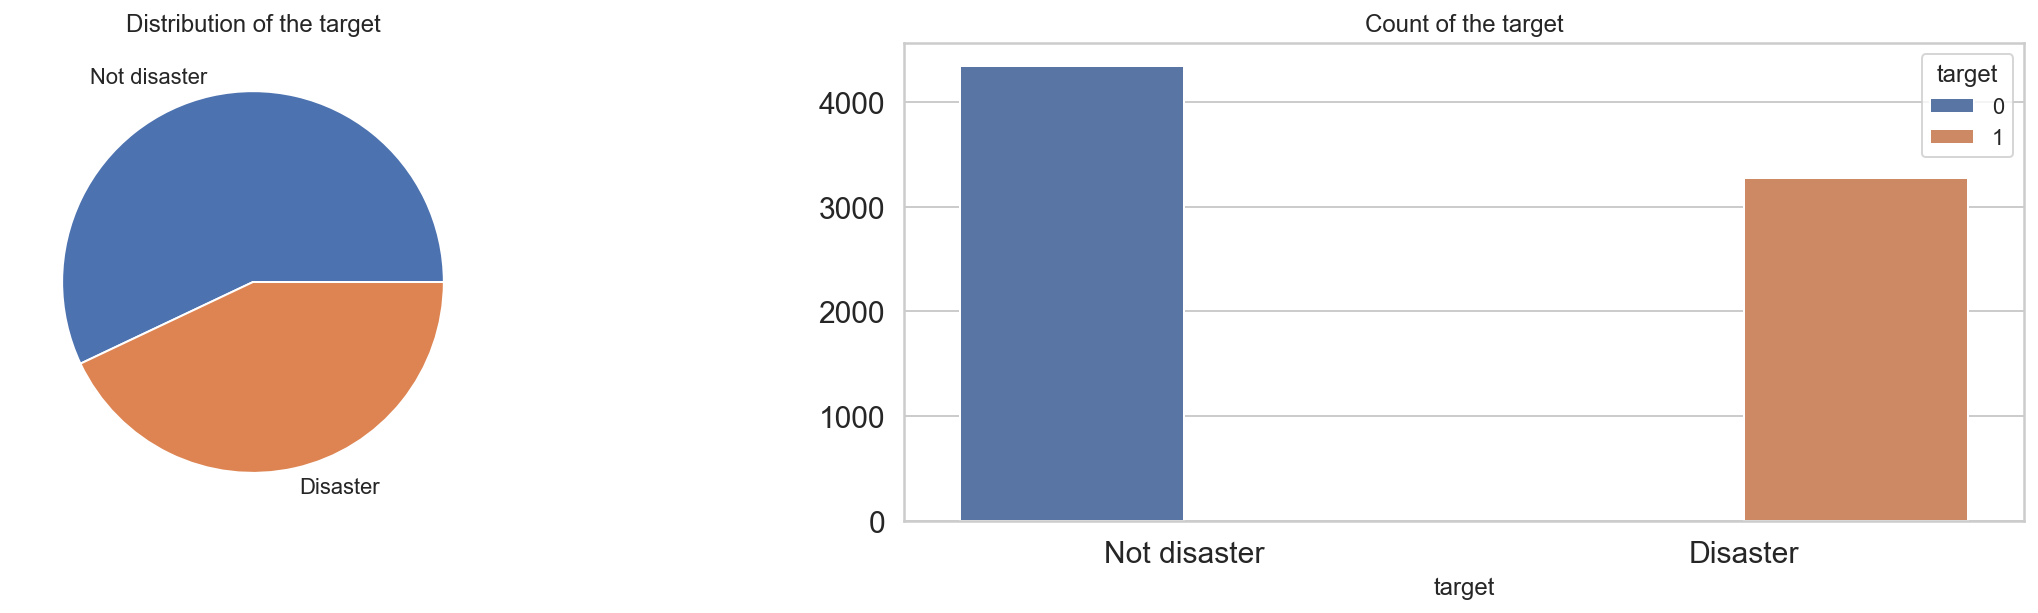

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4))
plt.tight_layout()

df.groupby('target').count()['text'].plot(kind='pie', ax=axes[0], labels=['Not disaster', 'Disaster'])
sns.countplot(x=df['target'], hue=df['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_title('Distribution of the target')

axes[1].set_ylabel('')
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].set_xticklabels(['Not disaster', 'Disaster'])
axes[1].set_title('Count of the target')

plt.show()